Questions to address:
1. What is the correlation between the variables and the price? Why do you think some variables are more correlated than others? 
2. How many qualitative and quantitative variables are there? How would you transform the qualitative values into numerical values?

1. What is the correlation between the variables and the price? Why do you think some variables are more correlated than others? 

In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

house_data=pd.read_csv("../data/cleaned/properties.csv")

After some analysis, it looks like the data is not normally distributed, so I'm going to use a method of correlation that works for all kinds of data distributions for a preliminary look -Spearmans

In [ ]:

x_axis_labels = ['Price','Zip Code','Construction Year','Total Area','No. Bedrooms','Furnished','Open Fire','Terrace','Garden','Swimming pool','Kitchen Level','Floodzone','Energy Consumption','Double Glazing'] # labels for x-axis
y_axis_labels = ['Price','Zip Code','Construction Year','Total Area','No. Bedrooms','Furnished','Open Fire','Terrace','Garden','Swimming pool','Kitchen Level','Floodzone','Energy Consumption','Double Glazing'] # labels for y-axis

mask = np.zeros_like(house_data[['price','zip_code','construction_year','total_area_sqm','nbr_bedrooms','fl_furnished','fl_open_fire','terrace_sqm','garden_sqm','fl_swimming_pool','nr_equipped_kitchen','fl_floodzone','primary_energy_consumption_sqm','fl_double_glazing']].corr(method='spearman'), dtype=np.bool)
mask[np.triu_indices_from(mask,1)] = True
plt.figure(figsize=(10,10))
sns.heatmap(house_data[['price','zip_code','construction_year','total_area_sqm','nbr_bedrooms','fl_furnished','fl_open_fire','terrace_sqm','garden_sqm','fl_swimming_pool','nr_equipped_kitchen','fl_floodzone','primary_energy_consumption_sqm','fl_double_glazing']].corr(method='spearman').round(3),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask,
            linewidths=.5,
            annot_kws={"fontsize":8},
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)

In [118]:
#Transforming data into Ordinal
#Cleaning existing kitchen data
ord_house_data= house_data.drop(house_data[house_data['equipped_kitchen'] == 'MISSING'].index)

#Assigning numeric values to kitchen categories
ord_house_data['nr_equipped_kitchen']=ord_house_data['equipped_kitchen'].replace(['SEMI_EQUIPPED','USA_SEMI_EQUIPPED','HYPER_EQUIPPED','USA_HYPER_EQUIPPED','INSTALLED','USA_INSTALLED','USA_UNINSTALLED','UNINSTALLED','NOT_INSTALLED'],[3,3,4,4,2,2,1,1,1])

#Cleaning existing state of building data
ord_house_data= ord_house_data.drop(ord_house_data[ord_house_data['state_building'] == 'MISSING'].index)

#Assigning numeric values to state of building categories
ord_house_data['nr_state_building']=ord_house_data['state_building'].replace(['AS_NEW','JUST_RENOVATED','GOOD','TO_BE_DONE_UP','TO_RESTORE','TO_RENOVATE'],[5,5,4,3,2,1])


C:\Users\rasmi\AppData\Local\Temp\ipykernel_32668\866228954.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\rasmi\AppData\Local\Temp\ipykernel_32668\866228954.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<Axes: title={'center': 'Correlation between quantitative variables and price'}>

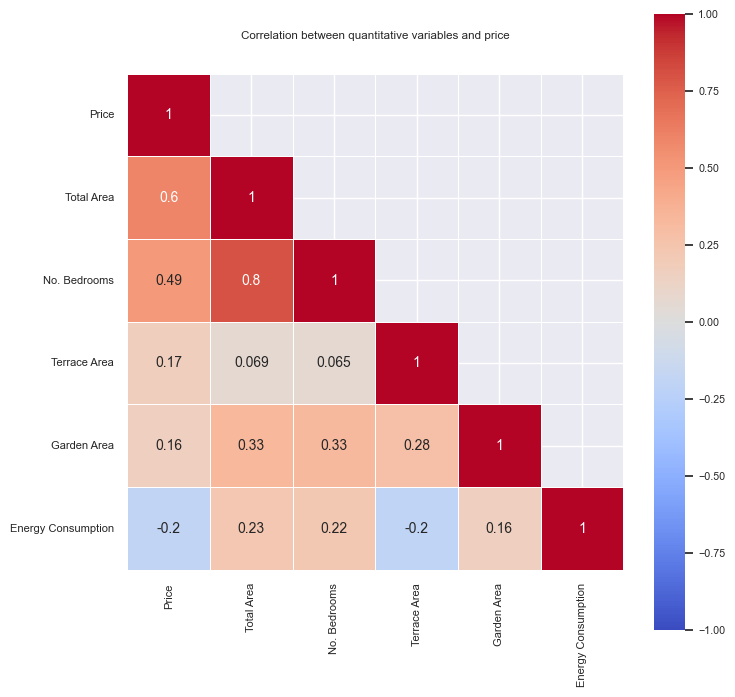

In [151]:
#Correlation between quantitative variables using a heatmap
x_axis_labels = ['Price','Total Area','No. Bedrooms','Terrace Area','Garden Area','Energy Consumption'] # labels for x-axis
y_axis_labels = ['Price','Total Area','No. Bedrooms','Terrace Area','Garden Area','Energy Consumption'] # labels for y-axis

mask = np.zeros_like(house_data[['price','total_area_sqm','nbr_bedrooms','terrace_sqm','garden_sqm','primary_energy_consumption_sqm']].corr(method='spearman'), dtype=np.bool)
mask[np.triu_indices_from(mask,1)] = True
plt.figure(figsize=(8,8))
plt.title('Correlation between quantitative variables and price',pad=25)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

sns.heatmap(house_data[['price','total_area_sqm','nbr_bedrooms','terrace_sqm','garden_sqm','primary_energy_consumption_sqm']].corr(method='spearman').round(3),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask,
            linewidths=.5,
            annot_kws={"fontsize":10},
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            square=True)


<Axes: title={'center': 'Correlation between ordinal variables and price'}>

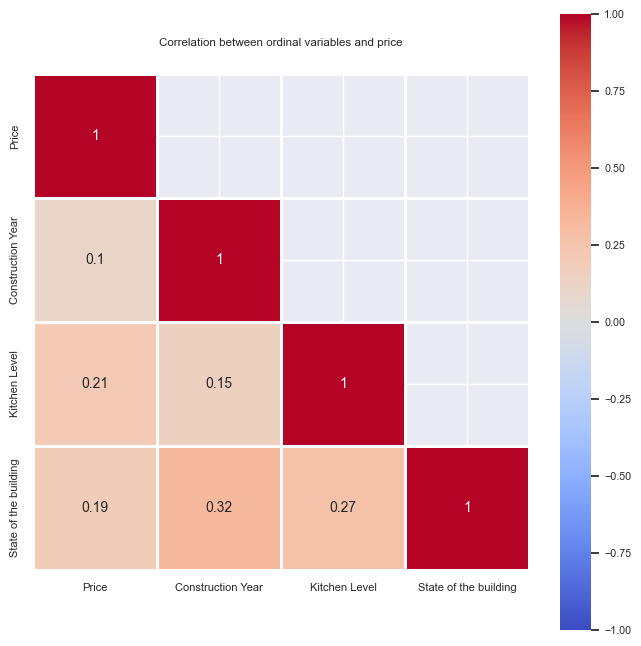

In [163]:
#Correlation between ordinal values and price
x_axis_labels = ['Price','Construction Year','Kitchen Level','State of the building'] # labels for x-axis
y_axis_labels = ['Price','Construction Year','Kitchen Level','State of the building'] # labels for y-axis

mask = np.zeros_like(ord_house_data[['price','construction_year','nr_equipped_kitchen','nr_state_building']].corr(method='kendall'), dtype=np.bool)
mask[np.triu_indices_from(mask,1)] = True
plt.figure(figsize=(8,8))
plt.title('Correlation between ordinal variables and price',pad=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

sns.heatmap(ord_house_data[['price','construction_year','nr_equipped_kitchen','nr_state_building']].corr(method='kendall').round(3),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask,
            linewidths=2,
            annot_kws={"fontsize":10},
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            square=True)


In [122]:
#Checking if price has a normal distribution
price_mean=house_data['price'].mean()
#423189.3527059914
price_median=house_data['price'].median()
#325000.0
std_dev_price=house_data['price'].std()
#401253.5552963024

skewedness=3*((price_mean-price_median)/std_dev_price)
#0.73411949683649

#price is right skewed, transforming the price field by applying log(base = e)

apply_log=lambda x: math.log(x)
house_data['log_price']=house_data.price.apply(apply_log)


C:\Users\rasmi\AppData\Local\Temp\ipykernel_32668\1129662779.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\rasmi\AppData\Local\Temp\ipykernel_32668\1129662779.py:29: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



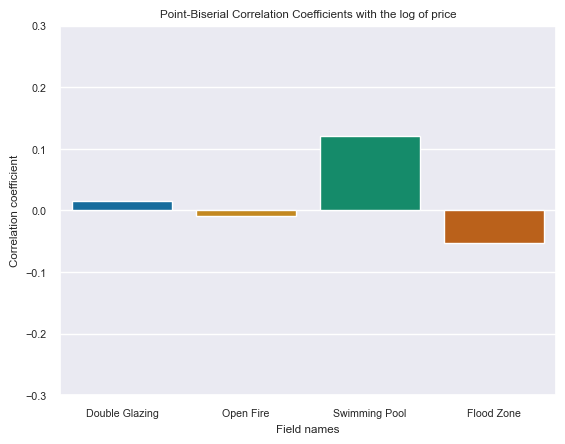

In [160]:
#Correlation between binary variables and price

from scipy import stats

corr_list = []
y = house_data['log_price'].astype(float)

bin_types=house_data[['log_price','fl_double_glazing','fl_open_fire','fl_swimming_pool','fl_floodzone']]
for column in bin_types:
    x=house_data[column]
    corr = stats.pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])


# Bar plot visualization
colors=sns.color_palette("colorblind")

#colors=get_colors(corr_list)
sns.barplot(x=['Double Glazing','Open Fire','Swimming Pool','Flood Zone'], y=corr_list[1:],palette=colors)
plt.title('Point-Biserial Correlation Coefficients with the log of price')
plt.ylabel('Correlation coefficient')
plt.xlabel('Field names')
plt.ylim([-0.3, 0.3])
plt.show()

In [ ]:
import pingouin as pg
# perform Welch's ANOVA for Nominal data

corr_anova = []
y = house_data['log_price'].astype(float)

cat_types=house_data[['log_price','property_type','subproperty_type','region','province','locality','zip_code']]
for column in cat_types:
    x=house_data[column]
    corr = pg.welch_anova(dv='log_price', between=column, data=house_data)
    corr_anova.append(format(corr['p-unc'].item(),'f'))

corr_anova

# Bar plot visualization, not very helpful as the coefficients are near zero for most of these values.
'''
colors=sns.color_palette("colorblind")
sns.barplot(x=['Property Type','Sub Property Type','Regoin','Province','Locality','Zipcode'], y=corr_anova[1:],palette=colors)
plt.title('Point-Biserial Correlation Coefficients with the log of price')
plt.ylabel('Correlation coefficient')
plt.xlabel('Field names')
plt.ylim([-0.3, 0.3])
plt.show()

# The p values for all categorical data except the zipcode is almost zero, the p value for zip codes is surprisingly 1
sns.scatterplot(data=house_data, x=house_data['zip_code'], y=house_data['log_price']
'''


In [54]:
#Creating groups by region for further analysis
groups=house_data.groupby("province")
flan=['Antwerp' , 'East Flanders', 'West Flanders','Limburg' ,'Flemish Brabant']
flanders=pd.concat([groups.get_group(name) for name in flan])
wall=['Walloon Brabant','Liège','Brussels', 'Hainaut' ,'Namur', 'Luxembourg']
wallonia=pd.concat([groups.get_group(name) for name in wall])

2. How many qualitative and quantitative variables are there? How would you transform the qualitative values into numerical values?

Quantitative:
price,total_area_sqm,nbr_bedrooms,terrace_sqm,garden_sqm,fl_,primary_energy_consumption_sqm : numeric, continuous

Qualitative:
Nominal:id,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,

Ordinal
construction_year, equipped_kitchen, state_building

Binary
fl_double_glazing, fl_furnished,fl_open_fire,fl_swimming_pool,fl_floodzone

Ordinal data will be converted using replace() and Nominal data will be replaced using Label encoding(sklearn, .cat.codes). One hot encoding can be used instead of label encoding so converted numerical data is not misinterpreted by the algorithm. Other methods to convert are frequency encoding, custom binary encoding.


Some graphs with the map

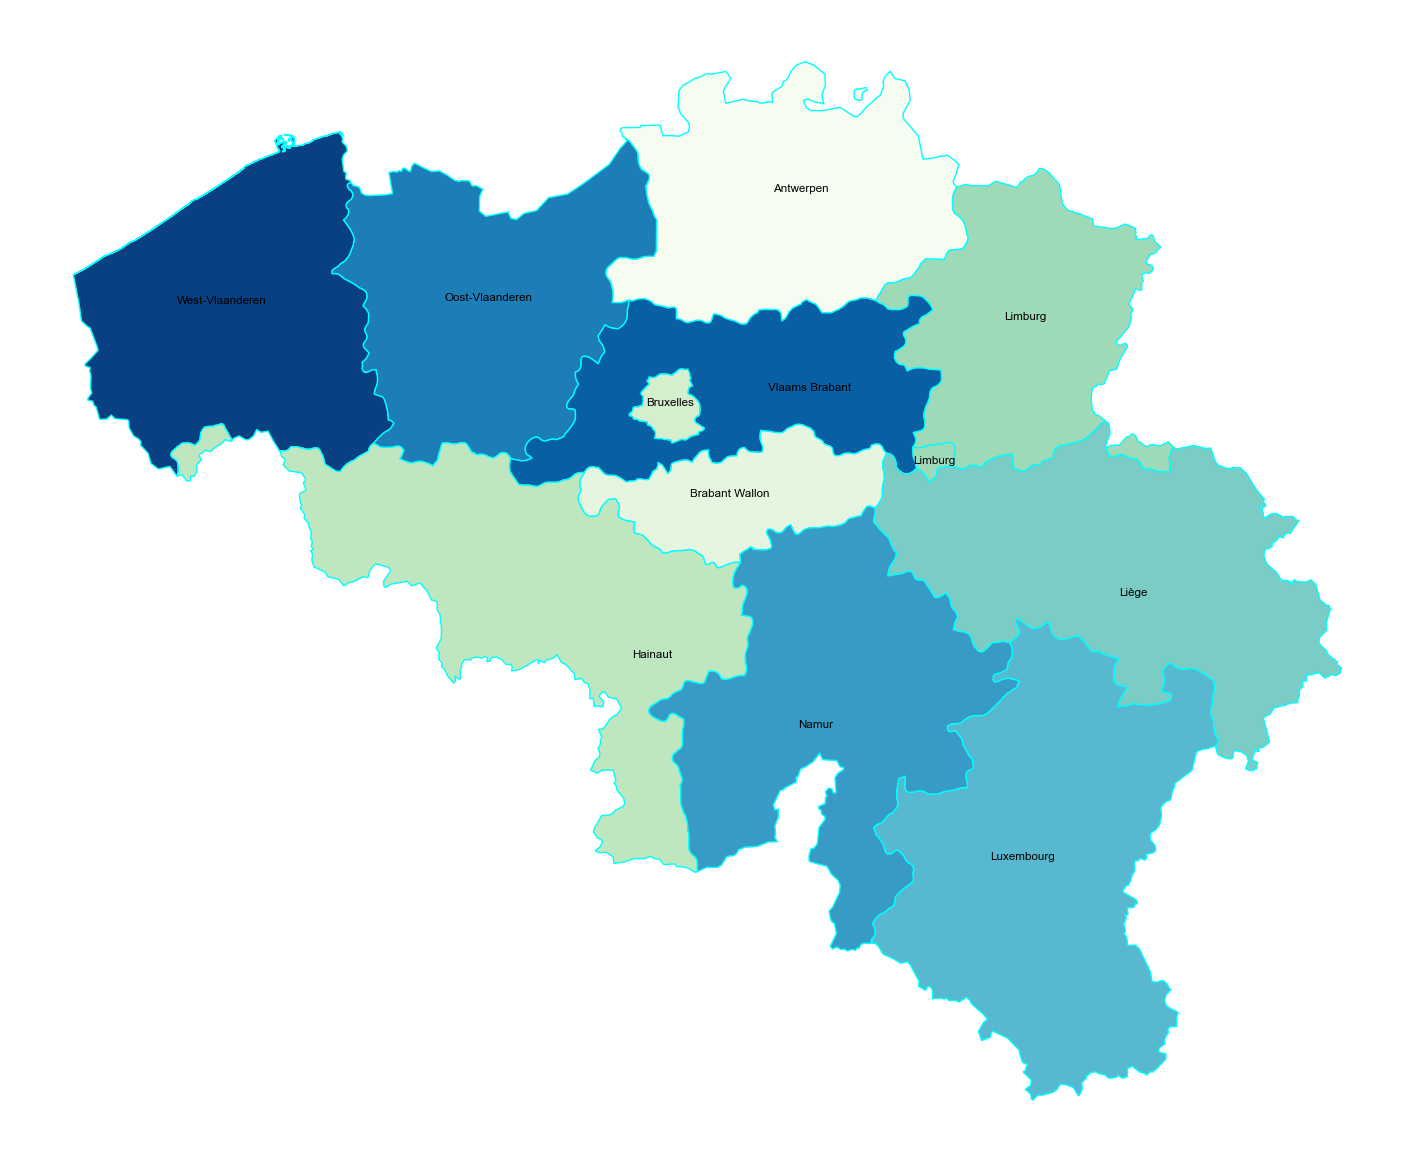

In [254]:
import geopandas as gpd

be=gpd.read_file(r'C:\Users\rasmi\Downloads\BEL_adm\BEL_adm2.shp')
be['coords'] = be['geometry'].apply(lambda x: x.representative_point().coords[:])
be['coords'] = [coords[0] for coords in be['coords']]
fig, ax = plt.subplots(figsize = (18,18))

f=be.plot(ax=ax,column='NAME_2',cmap='GnBu',edgecolor='cyan' )
f.axis('off')
for idx, row in be.iterrows():
   plt.annotate(row['NAME_2'], xy=row['coords'], horizontalalignment='center', color='black')

Text(0.5, 1.0, 'Distribution of datapoints')

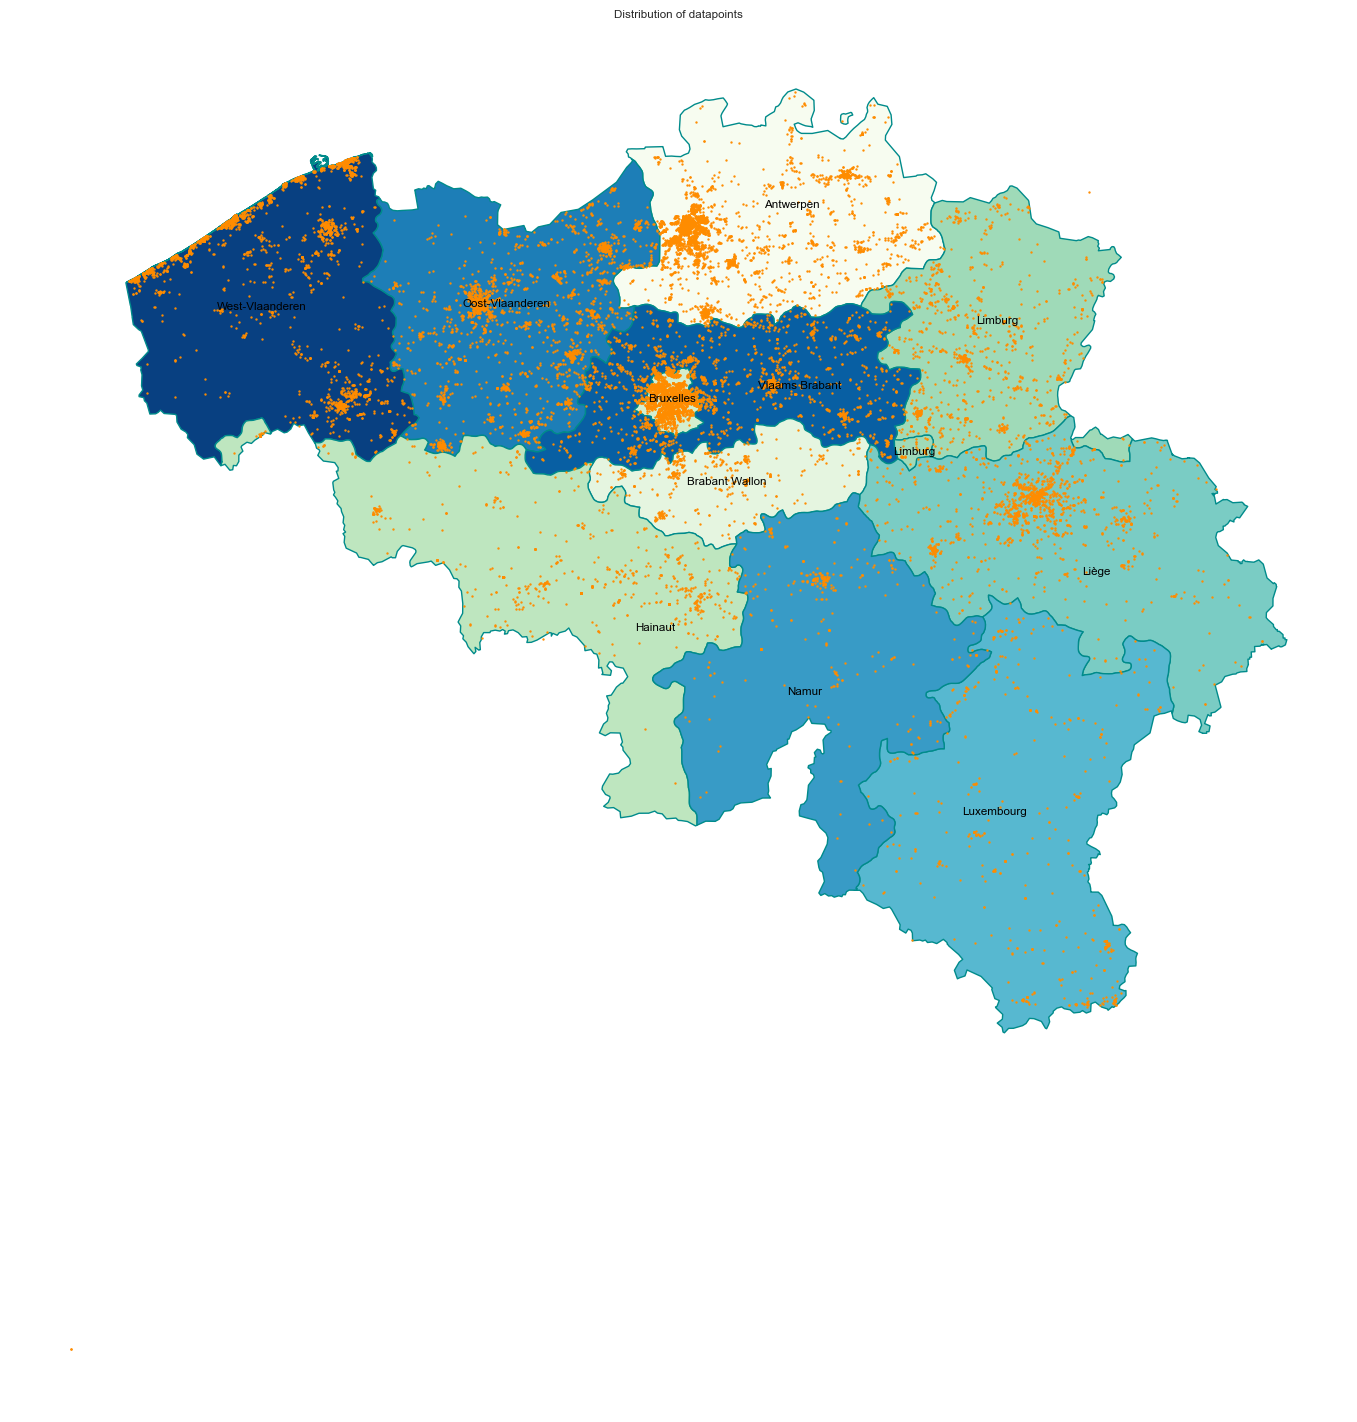

In [285]:
#Mapping the datapoints in our dataset geographically
be=gpd.read_file(r'C:\Users\rasmi\Downloads\BEL_adm\BEL_adm2.shp')
be['coords'] = be['geometry'].apply(lambda x: x.representative_point().coords[:])
be['coords'] = [coords[0] for coords in be['coords']]
fig, ax = plt.subplots(figsize = (18,18))

f=be.plot(ax=ax,column='NAME_2',cmap='GnBu',edgecolor='darkcyan')
for idx, row in be.iterrows():
   plt.annotate(row['NAME_2'], xy=row['coords'], horizontalalignment='center', color='black')

house_gdf = gpd.GeoDataFrame(
    house_data, geometry=gpd.points_from_xy(house_data.longitude, house_data.latitude), crs="EPSG:4326")
f.axis('off')

#grps=house_gdf.groupby('province')
house_gdf.plot(ax=f,legend=True,markersize=0.5,color='darkorange')
plt.title('Distribution of datapoints')